<a href="https://colab.research.google.com/github/lilrachel1985/House_Rent_Analysis/blob/main/AirBnB.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
#Method 1- Converting to datetime using parse_dates
import pandas as pd
listings=pd.read_csv("Listings.csv",encoding="ISO-8859-1",low_memory=False,parse_dates=["host_since"])


In [3]:
listings.head()

,listing_id,name,host_id,host_since,host_location,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_total_listings_count,...,minimum_nights,maximum_nights,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,instant_bookable
0,281420,"Beautiful Flat in le Village Montmartre, Paris",1466919,2011-12-03,"Paris, Ile-de-France, France",NaN,NaN,NaN,f,1.0,...,2,1125,100.0,10.0,10.0,10.0,10.0,10.0,10.0,f
1,3705183,39 mÃÂ² Paris (Sacre CÃ âur),10328771,2013-11-29,"Paris, Ile-de-France, France",NaN,NaN,NaN,f,1.0,...,2,1125,100.0,10.0,10.0,10.0,10.0,10.0,10.0,f
2,4082273,"Lovely apartment with Terrace, 60m2",19252768,2014-07-31,"Paris, Ile-de-France, France",NaN,NaN,NaN,f,1.0,...,2,1125,100.0,10.0,10.0,10.0,10.0,10.0,10.0,f
3,4797344,Cosy studio (close to Eiffel tower),10668311,2013-12-17,"Paris, Ile-de-France, France",NaN,NaN,NaN,f,1.0,...,2,1125,100.0,10.0,10.0,10.0,10.0,10.0,10.0,f
4,4823489,Close to Eiffel Tower - Beautiful flat : 2 rooms,24837558,2014-12-14,"Paris, Ile-de-France, France",NaN,NaN,NaN,f,1.0,...,2,1125,100.0,10.0,10.0,10.0,10.0,10.0,10.0,f


In [4]:
listings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 279712 entries, 0 to 279711
Data columns (total 33 columns):
 #   Column                       Non-Null Count   Dtype         
---  ------                       --------------   -----         
 0   listing_id                   279712 non-null  int64         
 1   name                         279539 non-null  object        
 2   host_id                      279712 non-null  int64         
 3   host_since                   279547 non-null  datetime64[ns]
 4   host_location                278872 non-null  object        
 5   host_response_time           150930 non-null  object        
 6   host_response_rate           150930 non-null  float64       
 7   host_acceptance_rate         166625 non-null  float64       
 8   host_is_superhost            279547 non-null  object        
 9   host_total_listings_count    279547 non-null  float64       
 10  host_has_profile_pic         279547 non-null  object        
 11  host_identity_verified    

In [ ]:
# Method 2- Converting to date-time by ovewriting using to_datetime()
listings["host_since"]=pd.to_datetime(listings["host_since"])

In [5]:
paris_listings=(
      listings
      .query("city=='Paris'")
      .loc[:,["host_since","neighbourhood","accommodates","city","price"]]
)

In [6]:
paris_listings.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 64690 entries, 0 to 279711
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   host_since     64657 non-null  datetime64[ns]
 1   neighbourhood  64690 non-null  object        
 2   accommodates   64690 non-null  int64         
 3   city           64690 non-null  object        
 4   price          64690 non-null  int64         
dtypes: datetime64[ns](1), int64(2), object(2)
memory usage: 3.0+ MB


In [7]:
paris_listings.isna().sum()

host_since       33
neighbourhood     0
accommodates      0
city              0
price             0
dtype: int64

In [8]:
paris_listings.describe()

,accommodates,price
count,64690.000000,64690.000000
mean,3.037997,113.096445
std,1.588766,214.433668
min,0.000000,0.000000
25%,2.000000,59.000000
50%,2.000000,80.000000
75%,4.000000,120.000000
max,16.000000,12000.000000


Prepping for Data Visualization
1. Created a table named paris_listings neighborhood , that groups paris_listings by 'neighbourhood' and calculates the mean price for neighborhood sorted from lowest to highest price
2. Created a table named paris_listings_accommodation. This table is filtered down to the most expensive neighborhood in Paris, grouped by the accomodations' column and contains the mean price for each value of 'accomodations'sorted from lowest to highest average price
3. Created a table called paris_listings_over_time , which is grouped by the 'host_since column'. Calculated the count of rows, representing the total number of new hosts and average price for each year


# New Section



In [9]:
paris_listings_neighborhood=(
    paris_listings
    .groupby("neighbourhood")
    .agg({"price":"mean"})
    .sort_values("price")
)

In [10]:
# Least Expensive Neighborhood in Paris
paris_listings_neighborhood.head()

,price
neighbourhood,
Menilmontant,74.942257
Buttes-Chaumont,82.690182
Buttes-Montmartre,87.209479
Reuilly,89.058402
Popincourt,90.559459


In [11]:
paris_listings_neighborhood=(
    paris_listings
    .groupby("neighbourhood")
    .agg({"price":"mean"})
    .sort_values("price")
)

In [12]:
# Most Expensive Neighborhood in Paris
paris_listings_neighborhood.tail()

,price
neighbourhood,
Luxembourg,155.638639
Palais-Bourbon,156.856578
Passy,161.144635
Louvre,175.379972
Elysee,210.536765


In [13]:
paris_listings_accommodates=(
    paris_listings
    .query("neighbourhood=='Elysee' ")
    .groupby("accommodates")
    .agg({"price":"mean"})
    .sort_values("price")

)

In [14]:
#Cheapest Price is for those who house 1
paris_listings_accommodates.head()


,price
accommodates,
0,0.000000
1,79.522222
3,152.828767
2,155.103352
4,212.096070


In [15]:
#Highest Price when the house accomodates 10
paris_listings_accommodates.tail()

,price
accommodates,
12,529.625
16,800.000
11,805.000
13,842.500
14,971.000


In [16]:
paris_listings_over_time=(
    paris_listings
    .set_index("host_since")
    .resample("Y")
    .agg({
        "neighbourhood":"count",
        "price":"mean"

    })
)
paris_listings_over_time.head()

,neighbourhood,price
host_since,,
2008-12-31,4,77.750000
2009-12-31,106,159.641509
2010-12-31,416,125.031250
2011-12-31,1339,124.828230
2012-12-31,4592,111.578615



Data Visualization
-Built a horizontal bar chart of average rent price by neighbourhood. Which neighbourhoods stand out
-Built a horizontal bar chart of average price by accommodates in the most expensive neighbourhood. Are they intuitive
-Finally, build lineto charts of new hosts per year and average price by year. What happened to new hosts in 2015? Was average PRICE impacted



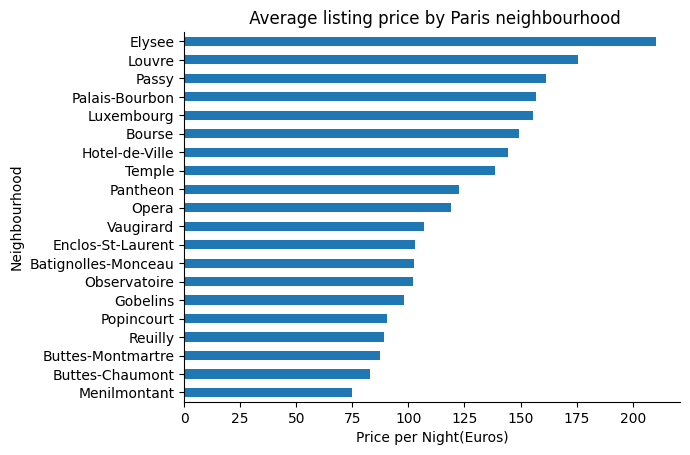

In [17]:
import seaborn as sns
(paris_listings_neighborhood
  .plot
  .barh(title=" Average listing price by Paris neighbourhood",
        xlabel="Price per Night(Euros)",
        ylabel="Neighbourhood",
        legend=None
)
 )
sns.despine()

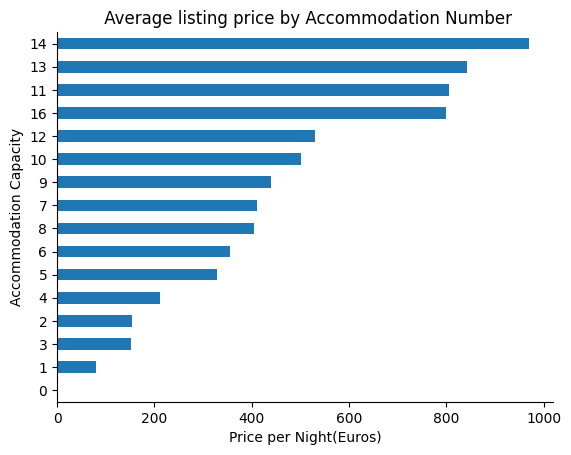

In [18]:

(paris_listings_accommodates
  .plot
  .barh(title=" Average listing price by Accommodation Number",
        xlabel="Price per Night(Euros)",
        ylabel="Accommodation Capacity",
        legend=None
)
 )
sns.despine()

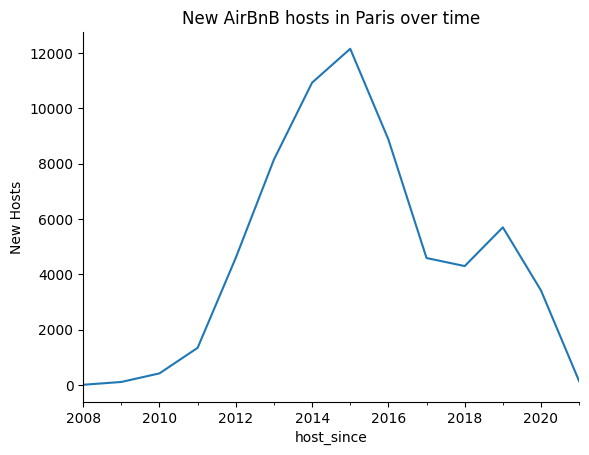

In [19]:
paris_listings_over_time["neighbourhood"].plot(
    ylabel="New Hosts",
    title="New AirBnB hosts in Paris over time"

)
sns.despine()

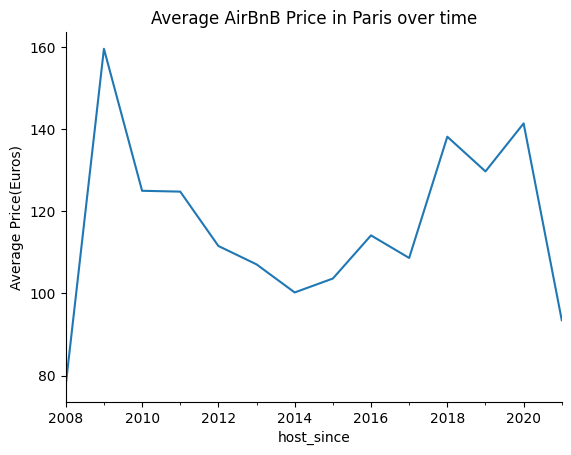

In [20]:
paris_listings_over_time["price"].plot(
    ylabel="Average Price(Euros)",
    title="Average AirBnB Price in Paris over time"

)
sns.despine()

Text(0.5, 1.0, '2015 Regulations Lead to fewer new hosts, Higher Prices')

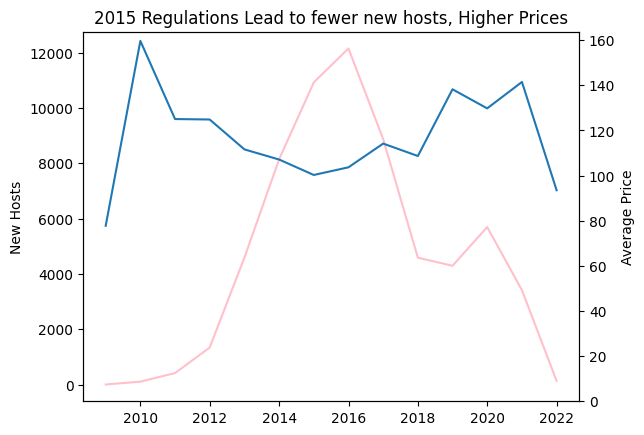

In [21]:
import matplotlib.pyplot as plt
fig, ax= plt.subplots()
ax.plot(
  paris_listings_over_time.index,
  paris_listings_over_time["neighbourhood"],
  label="New Hosts",
  c="pink"


)
ax.set_ylabel("New Hosts")
ax2=ax.twinx()
ax2.plot(
  paris_listings_over_time.index,
  paris_listings_over_time["price"],
  label="Average Price"



)
ax2.set_ylim(0)
ax2.set_ylabel("Average Price")
ax.set_title("2015 Regulations Lead to fewer new hosts, Higher Prices")

In [22]:
#Average Daily Rate (ADR):
ADR = sum(listings['price']) / len(listings)



In [26]:
#The average number of nights guests stay in a property.
ALOS = sum(listings['minimum_nights']) / len(listings)


In [27]:
guest_satisfaction = sum(listings['review_scores_rating']) / len(listings)


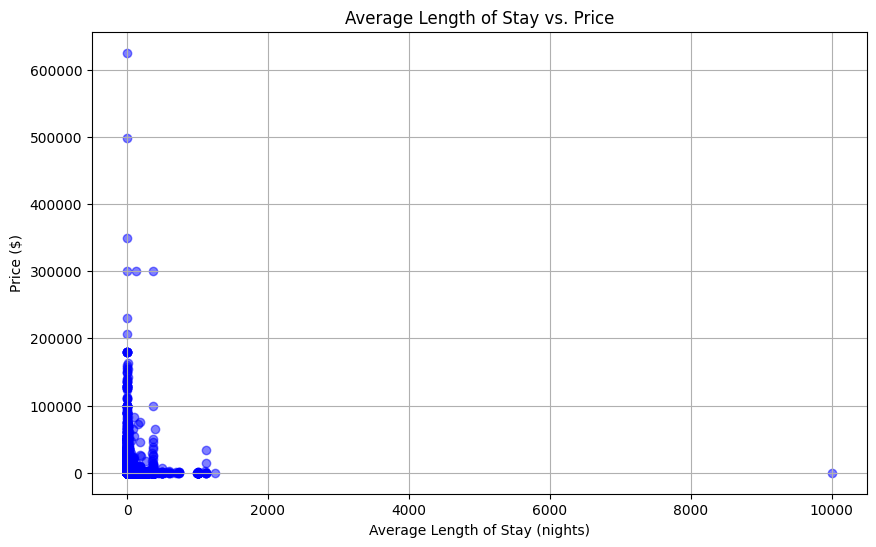

In [29]:
import matplotlib.pyplot as plt

minimum_nights = listings['minimum_nights']
price = listings['price']

# Creating a scatter plot to visualize the relationship between ALOS and Price
plt.figure(figsize=(10, 6))
plt.scatter(minimum_nights, price, alpha=0.5, color='blue')
plt.title('Average Length of Stay vs. Price')
plt.xlabel('Average Length of Stay (nights)')
plt.ylabel('Price ($)')
plt.grid(True)
plt.show()



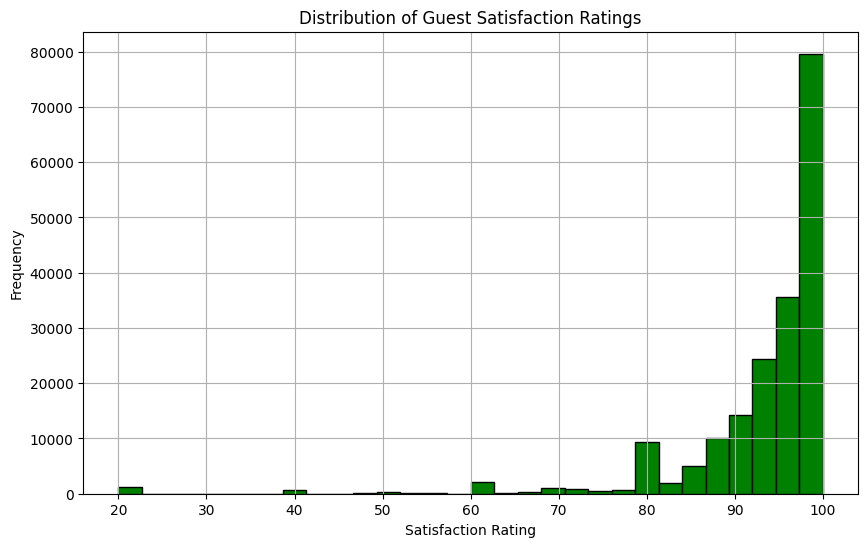

In [30]:
import matplotlib.pyplot as plt

# Assuming 'listings' is your DataFrame containing Airbnb data
# Extracting the 'review_scores_rating' column for guest satisfaction ratings
guest_satisfaction_ratings = listings['review_scores_rating']

# Plotting a histogram to visualize the distribution of guest satisfaction ratings
plt.figure(figsize=(10, 6))
plt.hist(guest_satisfaction_ratings.dropna(), bins=30, color='green', edgecolor='black')
plt.title('Distribution of Guest Satisfaction Ratings')
plt.xlabel('Satisfaction Rating')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()
